In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Packages**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error


# **Importing the Dataset**

In [3]:
## Using the base knowledge make a predition model without using a pipeline. ##
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.info()
# df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
countNotSurvive = len(df_train[df_train.Survived == 0])
countSurvive = len(df_train[df_train.Survived == 1])
print("Not Survive Percentage: {:.2f}%".format((countNotSurvive / (len(df_train.Survived))*100)))
print("Survive Percentage: {:.2f}%".format((countSurvive / (len(df_train.Survived))*100)))

Not Survive Percentage: 61.62%
Survive Percentage: 38.38%


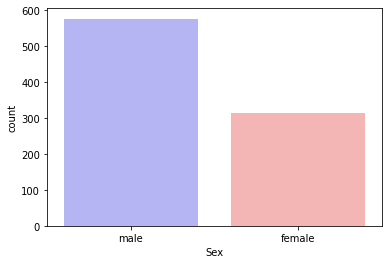

In [8]:
sns.countplot(x='Sex', data=df_train, palette="bwr")
plt.xlabel("Sex")
plt.show()

In [9]:
countFemale = len(df_train[df_train.Sex == "female"])
countMale = len(df_train[df_train.Sex == "male"])
print("Female Percentage: {:.2f}%".format((countFemale / (len(df_train.Sex))*100)))
print("Male Percentage: {:.2f}%".format((countMale / (len(df_train.Sex))*100)))

Female Percentage: 35.24%
Male Percentage: 64.76%


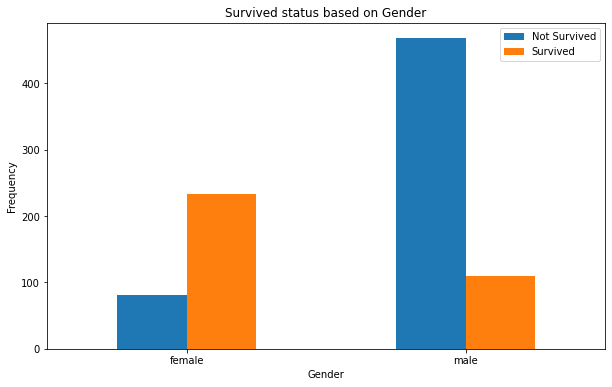

In [10]:
pd.crosstab(df_train.Sex,df_train.Survived).plot(kind="bar",figsize=(10,6))
plt.title('Survived status based on Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Frequency')
plt.show()

# **Tackling the null values Problem**

In [11]:
null_cols = df_train.isna().sum()
null_cols

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train = df_train.drop(columns='Cabin', axis=1)

In [13]:
df_train.Age.fillna(df_train.Age.mean(), inplace=True)

In [14]:
df_train.Embarked.fillna(df_train.Embarked.mode()[0], inplace=True)

In [15]:
df_train1 = df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test1 = df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [16]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df_test = df_test.drop(columns='Cabin', axis=1)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)
df_test.Fare.fillna(df_test.Fare.mean(), inplace=True)

In [19]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df_train.shape, df_test.shape

((891, 11), (418, 10))

In [21]:
df_train.Fare = np.sqrt(df_train.Fare)
df_test.Fare = np.sqrt(df_train.Fare)

In [22]:
df_train.SibSp = np.sqrt(df_train.SibSp)
df_test.SibSp = np.sqrt(df_test.SibSp)

In [23]:
df_train.Parch = np.sqrt(df_train.Parch)
df_test.Parch = np.sqrt(df_test.Parch)

# **Data Viz**

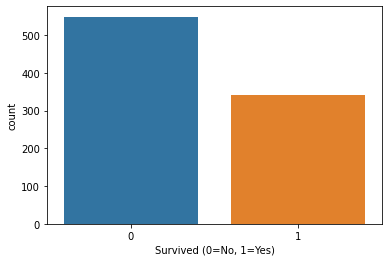

In [24]:
sns.countplot(x='Survived', data = df_train)
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

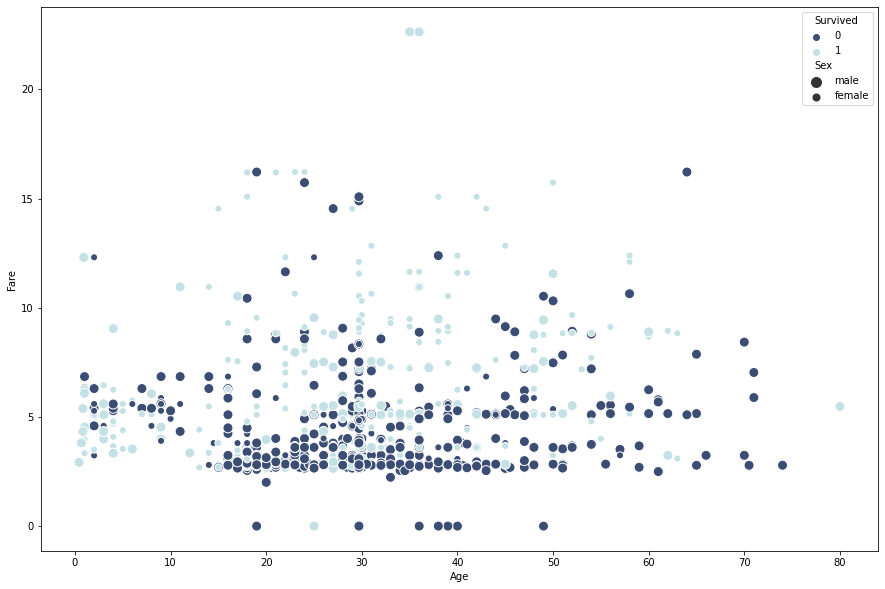

In [25]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="Age", y="Fare",
                hue="Survived", size="Sex",
                palette="ch:r=-.2,d=.3_r",
                sizes=(50, 100), linewidth=1,
                data=df_train, ax=ax)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

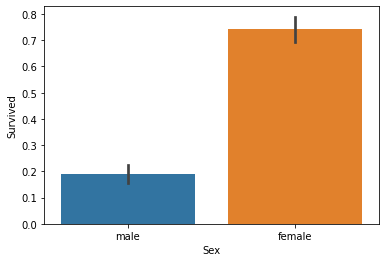

In [26]:
sns.barplot(x = 'Sex', y = 'Survived',data=df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


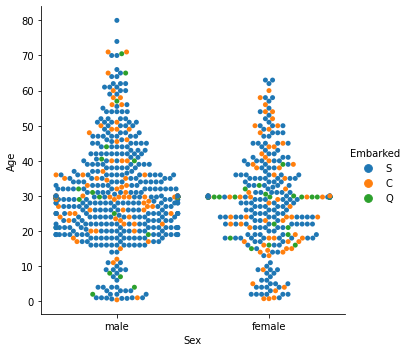

In [27]:
sns.catplot(x= 'Sex', y= 'Age', hue= 'Embarked', kind = 'swarm',data=df_train)

# **Dropping Columns**

In [28]:
df_train2 = df_train.drop(['Name', 'Ticket'], axis = 1)
# df_train2 = df_train.drop(['Cabin'], axis = 1)
df_train2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1.0,0.000000,2.692582,S
1,2,1,1,female,38.000000,1.0,0.000000,8.442944,C
2,3,1,3,female,26.000000,0.0,0.000000,2.815138,S
3,4,1,1,female,35.000000,1.0,0.000000,7.286975,S
4,5,0,3,male,35.000000,0.0,0.000000,2.837252,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0.0,0.000000,3.605551,S
887,888,1,1,female,19.000000,0.0,0.000000,5.477226,S
888,889,0,3,female,29.699118,1.0,1.414214,4.842520,S
889,890,1,1,male,26.000000,0.0,0.000000,5.477226,C


# **PreProcessing**

In [29]:
## IMPORTANT!!!! TO CONVERT CATEGORICAL DATA INTO NUMERICAL ##
    ## USE ".get_dummies" FOR THIS CONVERSION ##

df_train3 = pd.get_dummies(df_train2, columns=['Sex', 'Embarked'])

In [30]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 53.2 KB


In [31]:
df_train3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [32]:
s = (df_train3.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [33]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train3[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = df_train3.index
OH_cols_test.index = df_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_df_train = df_train3.drop(object_cols, axis=1)
num_df_test = df_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_df_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_df_test, OH_cols_test], axis=1)

# print("MAE from Approach 3 (One-Hot Encoding):") 
# print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

In [34]:
# categorical_cols = ['Sex', 'Embarked']

categorical_cols = [cname for cname in df_train3.columns if df_train3[cname].nunique() < 10 and df_train3[cname].dtype == "object"]

# numerical_cols = ['PassengerId', 'Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numerical_cols = [cname for cname in df_train3.columns if 
                df_train3[cname].dtype in ['int64', 'float64']]

In [35]:
numerical_transformer = SimpleImputer(strategy ='constant')

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

my_cols = categorical_cols + numerical_cols
df_train3 = df_train2[my_cols].copy()
# df_test2 = df_test[my_cols].copy()

# **Model**

In [36]:
train_X = df_train3.drop(["Survived"], axis=1)
train_y = df_train3["Survived"]
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)

In [37]:

# model = LinearRegression()

# pipeline_lr = Pipeline(steps =[
#     ('preprocessor', preprocessor),
#     ('model', model)
# ])

# lr = LinearRegression()
# lr.fit(X_train, y_train)

# preds = lr.predict(X_test)


# print('Logistic regression accuracy:', mean_absolute_error(y_test, preds)*100)

In [38]:
## Linear Regression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

l_r =  mean_absolute_error(y_test, pred_lr)*100

print('Linear regression accuracy:', l_r)

Linear regression accuracy: 38.97374017880924


In [39]:
## Random Forest

model_rfr = RandomForestRegressor(n_estimators=5000, random_state=0)
model_rfr.fit(X_train, y_train)
pred_rfr = model_rfr.predict(X_test)

r_f = mean_absolute_error(y_test, pred_rfr)*100

print('Random Forest accuracy:', r_f)

Random Forest accuracy: 33.64837988826816


In [40]:
## Logistic Regression

model_lor = LogisticRegression(solver='liblinear', max_iter = 5000, random_state = 0)
model_lor.fit(X_train, y_train)
pred_lor = model_lor.predict(X_test)

lo_r = mean_absolute_error(y_test, pred_lor)*100

print('Logistic regression accuracy:', lo_r)

Logistic regression accuracy: 24.581005586592177


In [41]:
## Decision Tree

model_dt = DecisionTreeClassifier(max_depth = 50, random_state = 0)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)

d_t = mean_absolute_error(y_test, pred_dt)*100

print('Descision Tree accuracy:', d_t)

Descision Tree accuracy: 32.402234636871505


In [42]:
## Support Vector Clssifier(SVC)

model_svc = SVC(kernel='linear', random_state = 0)
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)

sv_c = mean_absolute_error(y_test, pred_svc)*100

print('Support Vector Classifier accuracy:', sv_c)

Support Vector Classifier accuracy: 25.139664804469277


In [43]:
params = {'n_estimators':[100,200,300,400,500],
         'max_depth':[1,2,3,4,5],
         'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [44]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), params, cv=10)
GB.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [45]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=2)
0.6967136150234742
{'n_estimators': 100, 'max_leaf_nodes': 2, 'max_depth': 4}
4


In [46]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred_gb = GBclassifier.predict(X_test)

In [47]:
 g_b=  mean_absolute_error(y_test, y_pred_gb)*100

print('Support Vector Classifier accuracy:', g_b)

Support Vector Classifier accuracy: 27.932960893854748


In [48]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'Linear Regression',
                                 'Random Forest', 'Gradient Boosting'], 
                        'Accuracy': [lo_r, d_t, sv_c, l_r, r_f, g_b]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Linear Regression,38.973740
4,Random Forest,33.648380
1,Decision Tree,32.402235
5,Gradient Boosting,27.932961
2,SVC,25.139665
0,Logistic Regression,24.581006


In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
p_lr = lr.predict(X_test)

l_r1 =  mean_absolute_error(y_test, pred_lr)*100

print('Linear regression accuracy:', l_r1)

Linear regression accuracy: 38.97374017880924
